In [1]:
import torch, cv2
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

In [2]:
# Monkey patch the pose drawer
import sys
sys.path.append('/home/sam/git/Pose_Detector')
from Pose_Detector.Pose_Modules.Pose_Drawer import Pose_Drawer

In [3]:
from pose_detector.model.model import Model

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
model_base_path = '/home/sam/experiments/Pose_Detector/24_02_beta1_0/models/4.pt'
model = Model()
model.load_state_dict(torch.load(model_base_path))
model = model.eval().cuda()

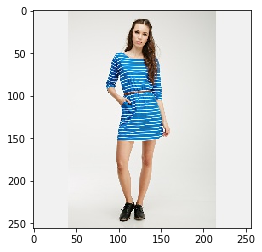

In [18]:
im_path = '/home/sam/data/V_U_Net_DeepFashion/test/05313_4.jpg'
img = cv2.imread(im_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [19]:
img_width, img_height, _ = img.shape
current_max_dim = max(img_width, img_height)
scale_factor = 256 / current_max_dim
resized_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)

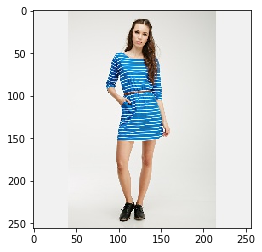

In [20]:
height, width, _ = resized_img.shape
canvas = np.zeros([256, 256, 3]).astype(int)
canvas[:height, :width, :] = resized_img
plt.imshow(canvas)

In [21]:
canvas = canvas.astype('double')
trans = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor = trans(canvas).float().cuda()

In [22]:
pred_heat_maps = model(tensor.view(1, 3, 256, 256))
last_hm = pred_heat_maps[1].view(18, 64, 64)

0.6107901

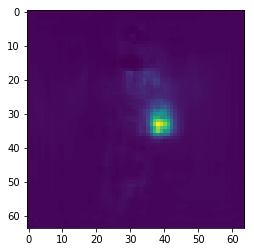

In [36]:
sample_hm = last_hm[10].cpu().detach().numpy()
plt.imshow(sample_hm)
np.amax(sample_hm)

In [24]:
heat_map_tensor = nn.functional.interpolate(pred_heat_maps[2], scale_factor=4).squeeze(0).cpu().detach().numpy()
heat_map_list = [heat_map_tensor[i] for i in range(heat_map_tensor.shape[0])]

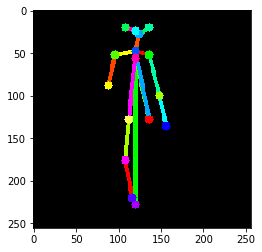

In [25]:
pose_drawer = Pose_Drawer()
pose_img = pose_drawer.draw_pose_img_from_heatmaps(heat_map_list)
plt.imshow(pose_img)

In [ ]:
k